# Feature Selection-Information gain - mutual information In Classification Problem Statements

## Mutual Information
* MI Estimate mutual information for a discrete target variable.

* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

* The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

### Inshort

* A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

* The mutual information between two random variables X and Y can be stated formally as follows:

>### I(X ; Y) = H(X) – H(X | Y) <br> 
Where I(X ; Y) is the mutual information for X and Y, <br>
H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. <br>
The result has the units of bits.

In [1]:
import pandas as pd

df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
X = df.drop(labels=["Wine"], axis=1)
y = df.Wine

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [35]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual info
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41294473, 0.30597235, 0.18087021, 0.23172962, 0.18435244,
       0.47188213, 0.7165149 , 0.12211629, 0.26230753, 0.63046791,
       0.57381188, 0.55205664, 0.54087061])

Above array the higher value indicates the importance of independent variable X on target variable Y

In [37]:
mutual_info = pd.DataFrame(mutual_info)
mutual_info.index = X_train.columns
mutual_info.columns=['Mutual Info']
mutual_info.sort_values(by='Mutual Info', ascending=False)

,Mutual Info
Flavanoids,0.716515
Color.int,0.630468
Hue,0.573812
OD,0.552057
Proline,0.540871
Phenols,0.471882
Alcohol,0.412945
Malic.acid,0.305972
Proanth,0.262308
Acl,0.231730


<AxesSubplot:>

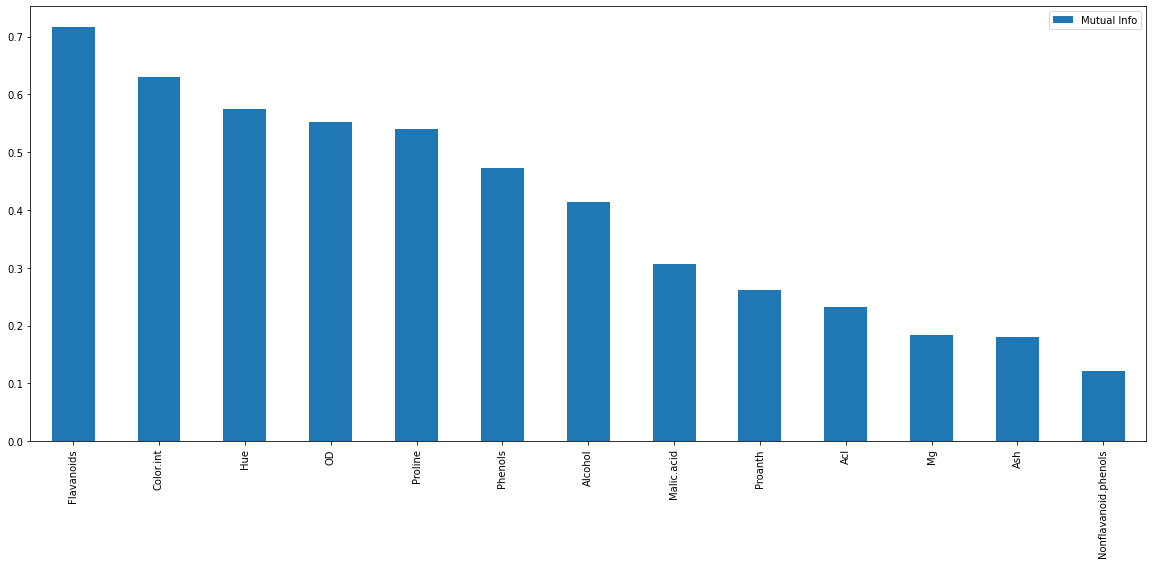

In [39]:
#let's plot the ordered mutual_info values per feature

mutual_info.sort_values(by="Mutual Info", ascending=False).plot.bar(figsize=(20, 8))

In [42]:
### For selecting best Features dependent on Target
from sklearn.feature_selection import SelectKBest

# Let's select top 5 important features
imp_five_cols = SelectKBest(mutual_info_classif, k=5)
imp_five_cols.fit(X_train, y_train)
X_train.columns[imp_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

### Difference Between Information Gain And Mutual Information

>#### Information Gain:
>* IG(S, a) = H(S) – H(S | a)

>#### Mutual_Information:
>* I(X ; Y) = H(X) – H(X | Y)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

#### Comparion of Univariate And Mutual Information
Comparison of F-test and mutual information https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py